In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirnotch
from tqdm import tqdm

# **PLOTEO DE LA SEÑAL**

Señal 1  EEG en reposo: [506. 505. 504. ... 510. 511. 511.]
Señal 2  Parpadeo : [506. 507. 510. ... 504. 504. 504.]
Señal 3 ejercicio mental : [507. 506. 508. ... 509. 511. 509.]


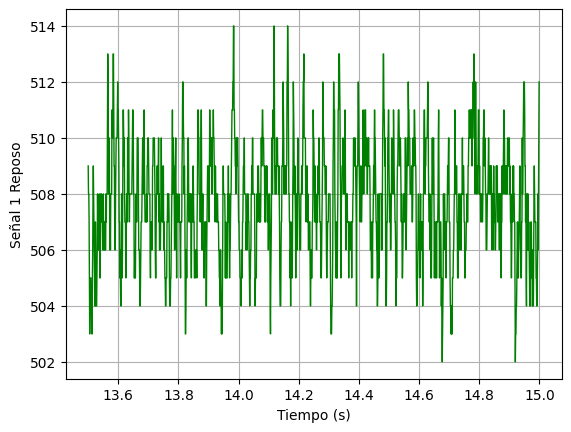

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array2= np.genfromtxt('/content/EEGparpadeo.txt')
array1=np.genfromtxt('/content/EEG30sreposo.txt')
array3=np.genfromtxt('/content/ejercicio2.txt')

array1 = array1[:,6]
print("Señal 1  EEG en reposo:",array1)
array2 = array2[:,6]
print("Señal 2  Parpadeo :",array2)
array3= array3[:,6]
print("Señal 3 ejercicio mental :",array3)

# Generar la señal (por ejemplo, una señal sinusoidal)
Fs = 1000  # Frecuencia de muestreo en Hz
inicio_segundo = 13.5
fin_segundo = 15
tiempo = np.arange(len(array1)) / Fs
inicio_muestra = int(inicio_segundo * Fs)
fin_muestra = int(fin_segundo * Fs)

plt.plot(tiempo[inicio_muestra:fin_muestra], array1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 1 Reposo')
plt.grid(True)

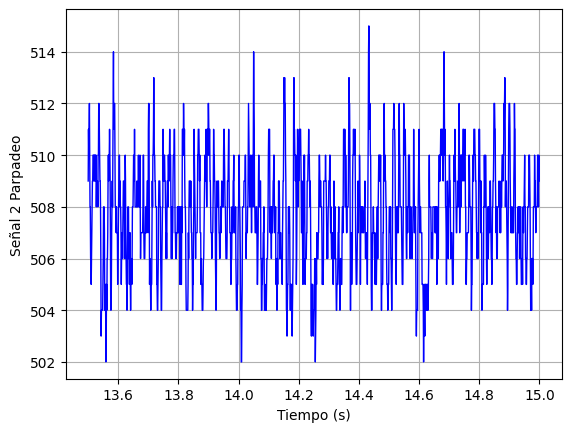

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], array2[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 2 Parpadeo')
plt.grid(True)

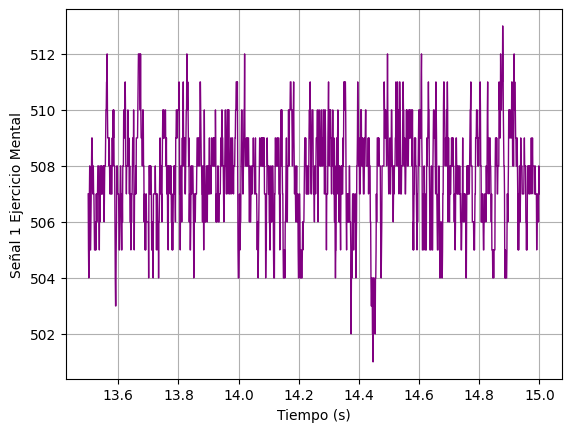

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], array3[inicio_muestra:fin_muestra], lw=1, color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 1 Ejercicio Mental')
plt.grid(True)

# **DFT DE N PUNTOS**

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

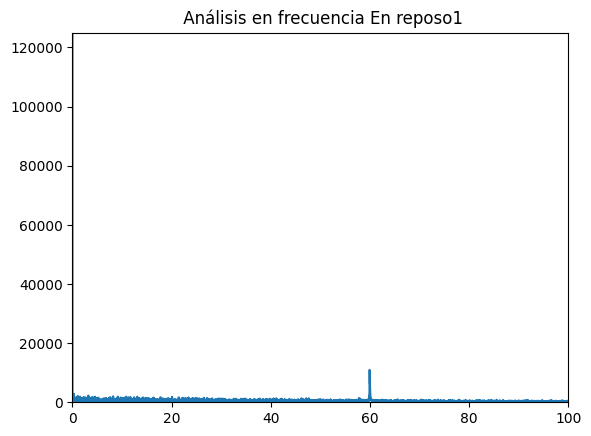

In [ ]:
Fs=1000
M = min(len(array1), len(array2), len(array3))
array1 = array1[:M]
array2 = array2[:M]
array3 = array3[:M]

# Vector de tiempo en segundos
t = np.arange(0, M) / Fs

# Transformada de Fourier
#transformada de fourier FFT
N1 = len(array1)
N2= len(array2)
N3=len(array3)
n = np.arange(0,M)

D1 = np.fft.fft(array1,N1)
D2 = np.fft.fft(array2,N2)
D3 = np.fft.fft(array3,N3)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]

#magnitud para las tres señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)

D2m = np.abs(D2)
D2m = np.round(D2m,3)

D3m = np.abs(D3)
D3m = np.round(D3m,3)


#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")

Text(0.5, 1.0, ' Análisis en frecuencia parpadeo')

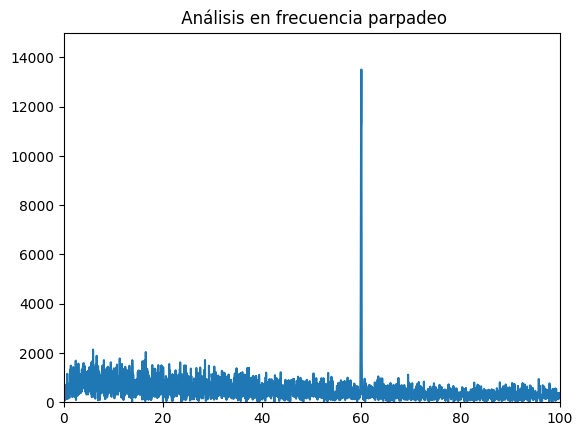

In [ ]:
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,15000])
plt.title(" Análisis en frecuencia parpadeo")

Text(0.5, 1.0, ' Análisis en frecuencia ejercicio mental')

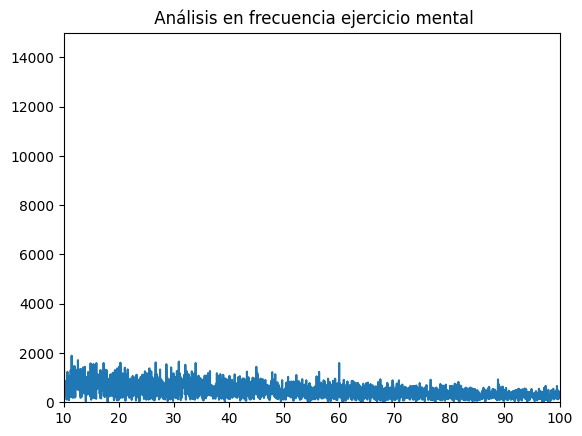

In [ ]:
plt.plot(F,D3m)
plt.xlim([10,100])
plt.ylim([0,15000])
plt.title(" Análisis en frecuencia ejercicio mental")

FIltro Notch

In [ ]:
f_interferencia = 60  # Supongamos que la interferencia está a 60 Hz

# Crea el filtro Notch
Q = 30  # Factor de calidad
bw = f_interferencia / Q  # Ancho de banda del filtro Notch
f0 = f_interferencia  # Frecuencia central del filtro Notch
nyquist = 0.5 * 1000  # Frecuencia de Nyquist
w0 = f0 / nyquist  # Frecuencia normalizada
b, a = iirnotch(w0, Q)

# Aplica el filtro Notch a la señal de ECG
reposo_EEG_filtrada = lfilter(b, a, array1)
parpadeo_EEG_filtrada = lfilter(b, a, array2)
ejercicio_EEG_filtrada = lfilter(b, a,array3)



# **Diseño de Filtro Bartlett**

Text(0.5, 1.0, 'Filtro Bartlett')

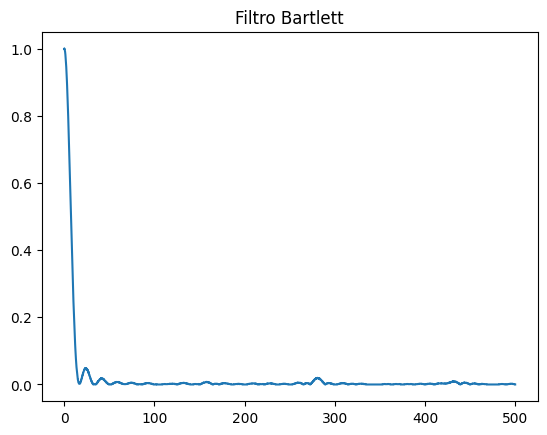

In [ ]:
# Longitud de la ventana
M=120
# Frecuencia de corte de Hz
Fc = 0.012 # valor seleccionado por la imagen dada

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w  = firwin(M, Fc, window='bartlett', fs=Fs)
w = np.round(w,3)

nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Bartlett")

# **Aplicacion del Filtro**

In [ ]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, np.array(1),reposo_EEG_filtrada)
y2 = lfilter(w, np.array(1),parpadeo_EEG_filtrada)
y3 = lfilter(w, np.array(1),ejercicio_EEG_filtrada)



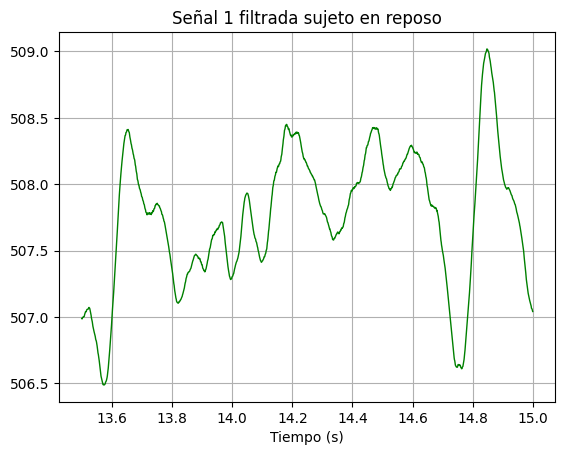

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.title('Señal 1 filtrada sujeto en reposo')
plt.grid(True)

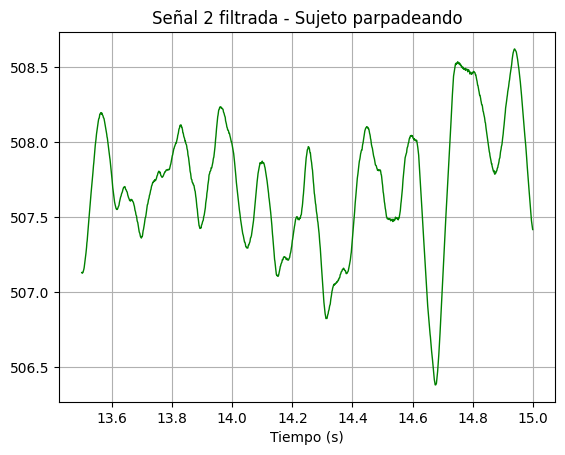

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y2[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.title('Señal 2 filtrada - Sujeto parpadeando')
plt.grid(True)

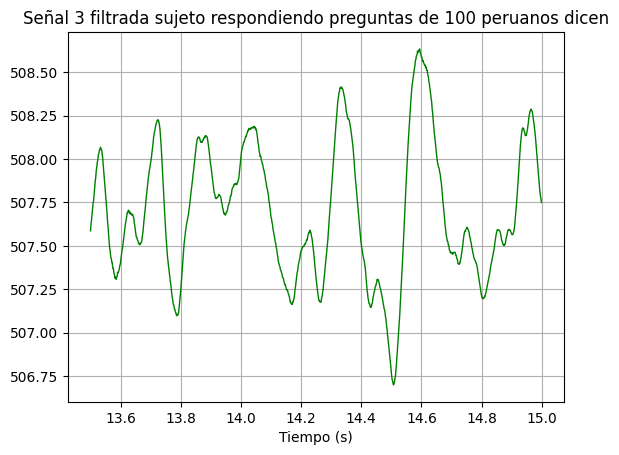

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y3[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.title('Señal 3 filtrada sujeto respondiendo preguntas de 100 peruanos dicen')
plt.grid(True)